In [1]:
# Add src to path
import sys
import os
sys.path.append(os.path.abspath("../src"))

# Import pipeline
from pipeline import BikeSharePipeline

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
# Create pipeline object
pipeline = BikeSharePipeline("C:/Users/Test/Desktop/DEPI-ONL4_AIS2_S2/dataAnalysis/Finalproject/code/data/fordgobike-tripdataFor201902.csv")

# Load dataset
pipeline.load_data()

# Show first rows
pipeline.df.head()


Shape: (183416, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Clean dataset
pipeline.clean_data()

# Get cleaned data
df = pipeline.get_data()

df.head()


Shape after cleaning: (165437, 17)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
6,1147,55:35.1,14:42.6,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,36.0
9,1049,49:47.7,07:17.0,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,27.0
10,458,57:57.2,05:35.4,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,23.0
11,506,56:55.5,05:21.7,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993.0,Male,No,26.0
12,1176,45:12.7,04:49.2,127,Valencia St at 21st St,37.756708,-122.421025,323,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990.0,Male,No,29.0


In [4]:
# Create new features
pipeline.engineer_features()

df = pipeline.get_data()

df.head()


c:\Users\Test\Desktop\DEPI-ONL4_AIS2_S2\dataAnalysis\Finalproject\code\src\pipeline.py:144: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df['start_time'], errors='coerce')


Reconstructing synthetic datetimes across February 2019.
Datetime reconstruction completed.
Feature engineering completed.
New columns added: duration_min, start_time_dt, hour, weekend_flag, age_group


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,start_time_dt,hour,weekend_flag,age_group
6,1147,55:35.1,14:42.6,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,36.0,19.116667,2019-02-07 04:55:35.100,4,0,30-44
9,1049,49:47.7,07:17.0,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,...,Subscriber,1992.0,Male,No,27.0,17.483333,2019-02-20 11:49:47.700,11,0,15-29
10,458,57:57.2,05:35.4,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996.0,Female,Yes,23.0,7.633333,2019-02-15 10:57:57.200,10,0,15-29
11,506,56:55.5,05:21.7,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343,Bryant St at 2nd St,37.783172,...,Subscriber,1993.0,Male,No,26.0,8.433333,2019-02-11 19:56:55.500,19,0,15-29
12,1176,45:12.7,04:49.2,127,Valencia St at 21st St,37.756708,-122.421025,323,Broadway at Kearny,37.798014,...,Customer,1990.0,Male,No,29.0,19.600000,2019-02-08 22:45:12.700,22,0,15-29


In [5]:
# Encode and scale dataset
pipeline.encode_and_scale()

df_processed = pipeline.get_processed_data()

df_processed.head()


Encoding and scaling completed.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,age,duration_min,start_time_dt,hour,weekend_flag,age_group,user_type_Subscriber,member_gender_Male,member_gender_Other,bike_share_for_all_trip_Yes
6,1147,55:35.1,14:42.6,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,...,0.290323,0.761037,2019-02-07 04:55:35.100,4,0,30-44,True,False,False,False
9,1049,49:47.7,07:17.0,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,...,0.145161,0.692362,2019-02-20 11:49:47.700,11,0,15-29,True,True,False,False
10,458,57:57.2,05:35.4,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,0.080645,0.278206,2019-02-15 10:57:57.200,10,0,15-29,True,False,False,True
11,506,56:55.5,05:21.7,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343,Bryant St at 2nd St,37.783172,...,0.129032,0.311843,2019-02-11 19:56:55.500,19,0,15-29,True,True,False,False
12,1176,45:12.7,04:49.2,127,Valencia St at 21st St,37.756708,-122.421025,323,Broadway at Kearny,37.798014,...,0.177419,0.781359,2019-02-08 22:45:12.700,22,0,15-29,False,True,False,False


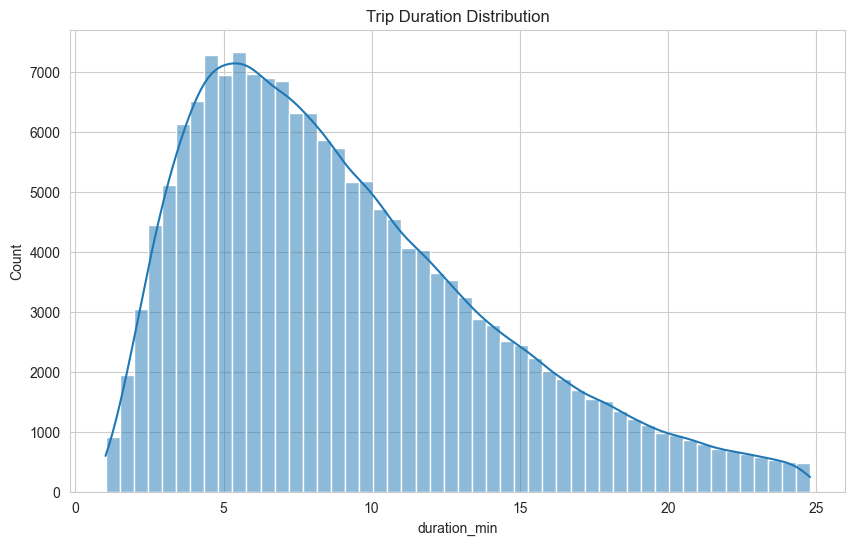

In [6]:
plt.figure(figsize=(10,6))

sns.histplot(
    df['duration_min'],
    bins=50,
    kde=True
)

plt.title("Trip Duration Distribution")

plt.show()


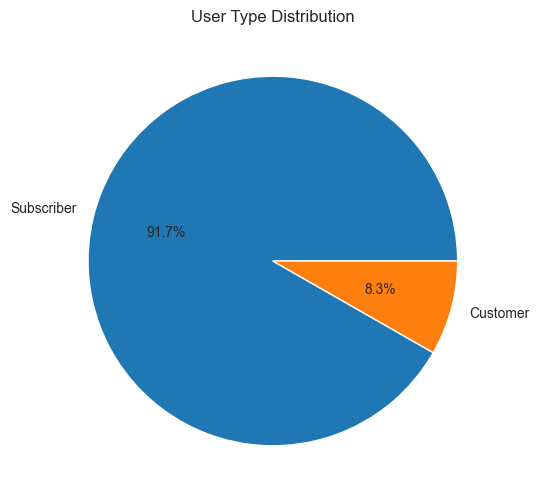

In [7]:
plt.figure(figsize=(8,6))

df['user_type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)

plt.title("User Type Distribution")

plt.ylabel("")

plt.show()


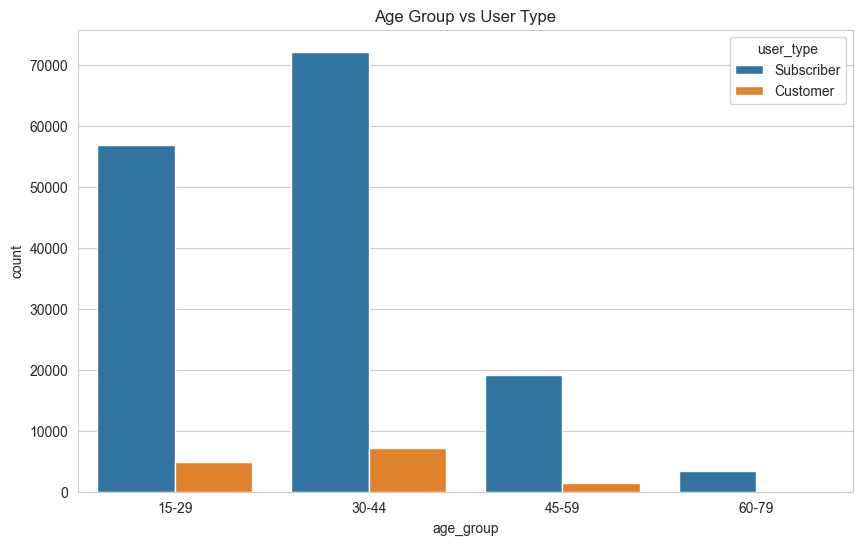

In [8]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x='age_group',
    hue='user_type'
)

plt.title("Age Group vs User Type")

plt.show()


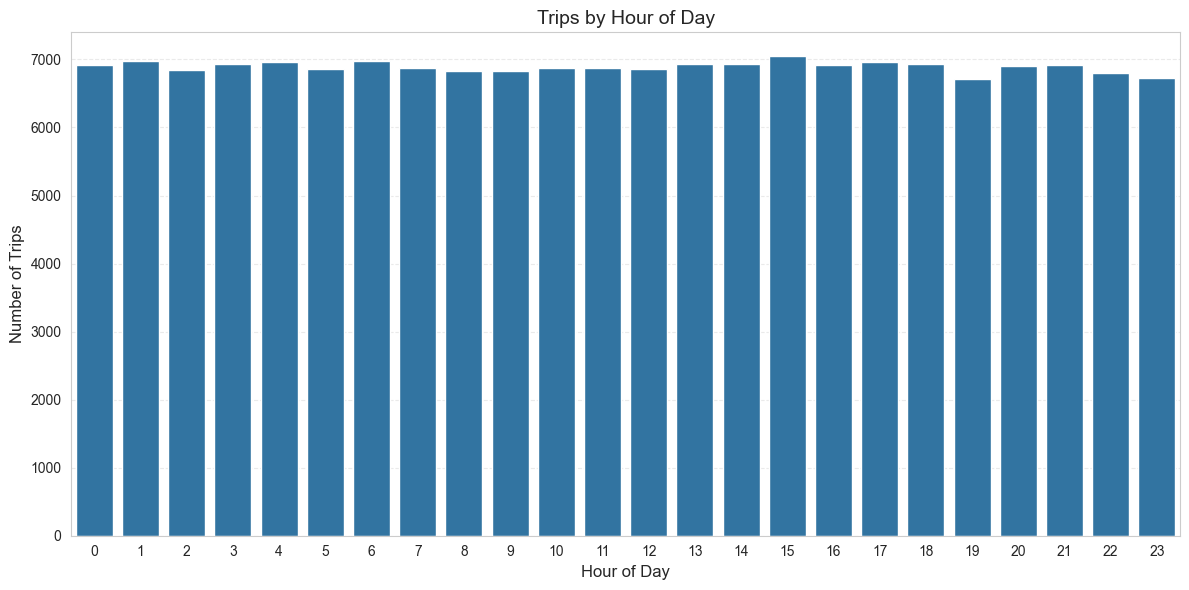

In [9]:
hour_counts = (
    df['hour']
    .value_counts()
    .sort_index()
)

# Create figure
plt.figure(figsize=(12,6))

# Use seaborn for better styling
sns.barplot(
    x=hour_counts.index,
    y=hour_counts.values
)

# Titles and labels
plt.title("Trips by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)

# Improve layout
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()
